# Demo 2: Plotting

Initialize KAN and create dataset

In [7]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

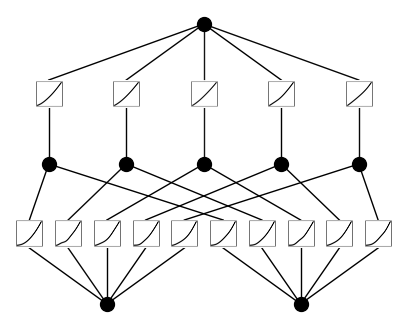

In [8]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

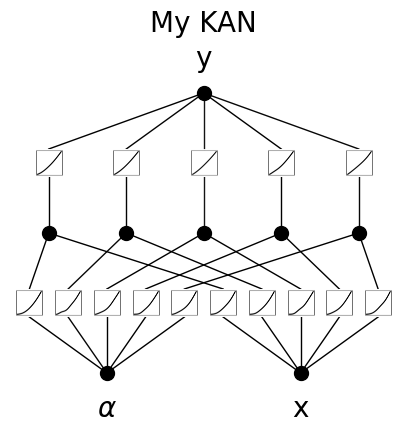

In [9]:
# if you want to add variable names and title
model.plot(beta=100, in_vars=[r'$\alpha$', 'x'], out_vars=['y'], title = 'My KAN')

Train KAN with sparsity regularization

In [10]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.54e-01 | test loss: 1.30e-01 | reg: 2.03e+01 : 100%|██| 20/20 [00:07<00:00,  2.54it/s]


$\beta$ controls the transparency of activations. Larger $\beta$ => more activation functions show up. We usually want to set a proper beta such that only important connections are visually significant. transparency is set to be ${\rm tanh}(\beta |\phi|_1)$ where $|\phi|_1$ is the l1 norm of the activation function. By default $\beta=3$.

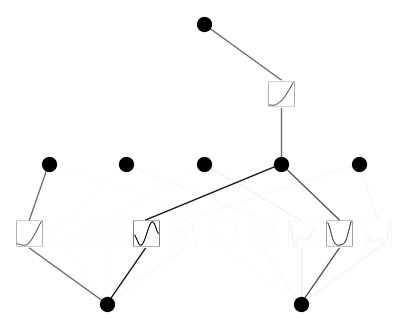

In [11]:
model.plot(beta=3)

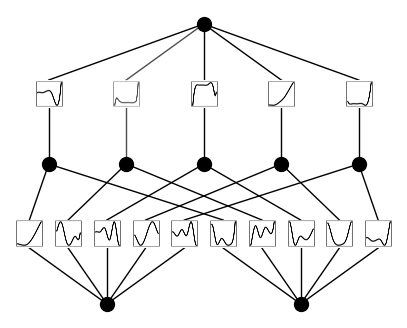

In [12]:
model.plot(beta=100000)

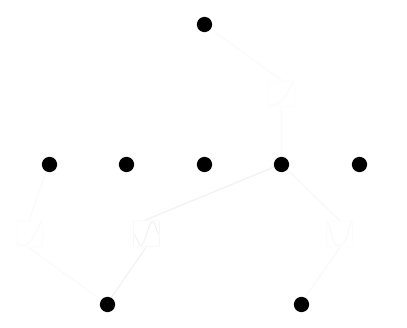

In [13]:
model.plot(beta=0.1)

After purning, "mask=True" will remove all connections that are connected to unsignificant neurons. The insignificant neurons themselves are still visualized. If you want those neurons to be removed as well, see below. Insignificant/Significant neurons are defined based on l1 norm of its incoming and outgoing functions.

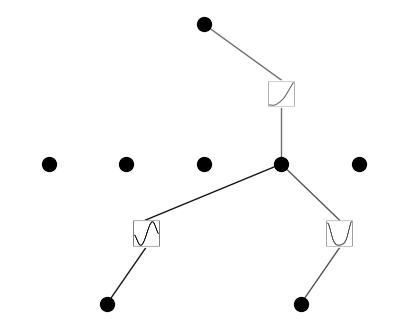

In [14]:
model.prune()
model.plot(mask=True)

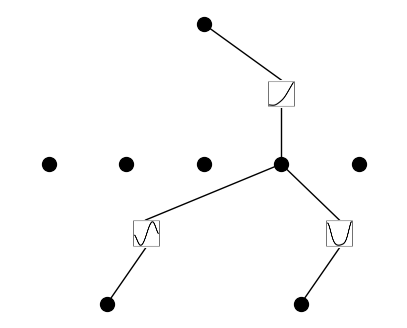

In [15]:
model.plot(mask=True, beta=100000)

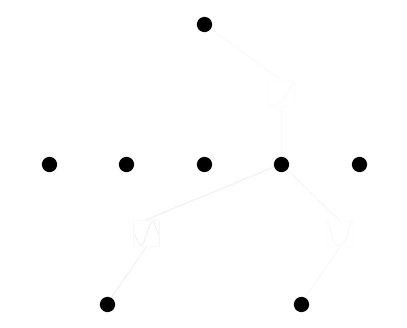

In [16]:
model.plot(mask=True, beta=0.1)

Remove insignificant neurons

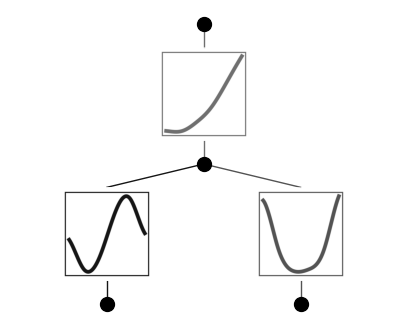

In [17]:
model2 = model.prune()
model2(dataset['train_input']) # it's important to do a forward first to collect activations
model2.plot()

Resize the figure using the "scale" parameter. By default: 0.5

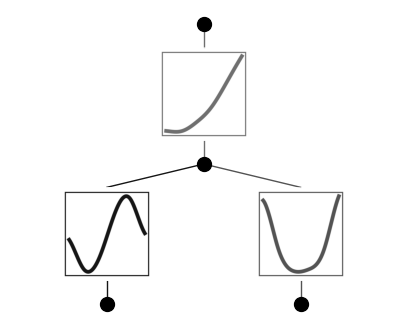

In [18]:
model2.plot(scale=0.5)

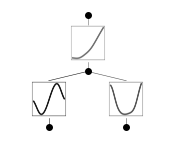

In [19]:
model2.plot(scale=0.2)

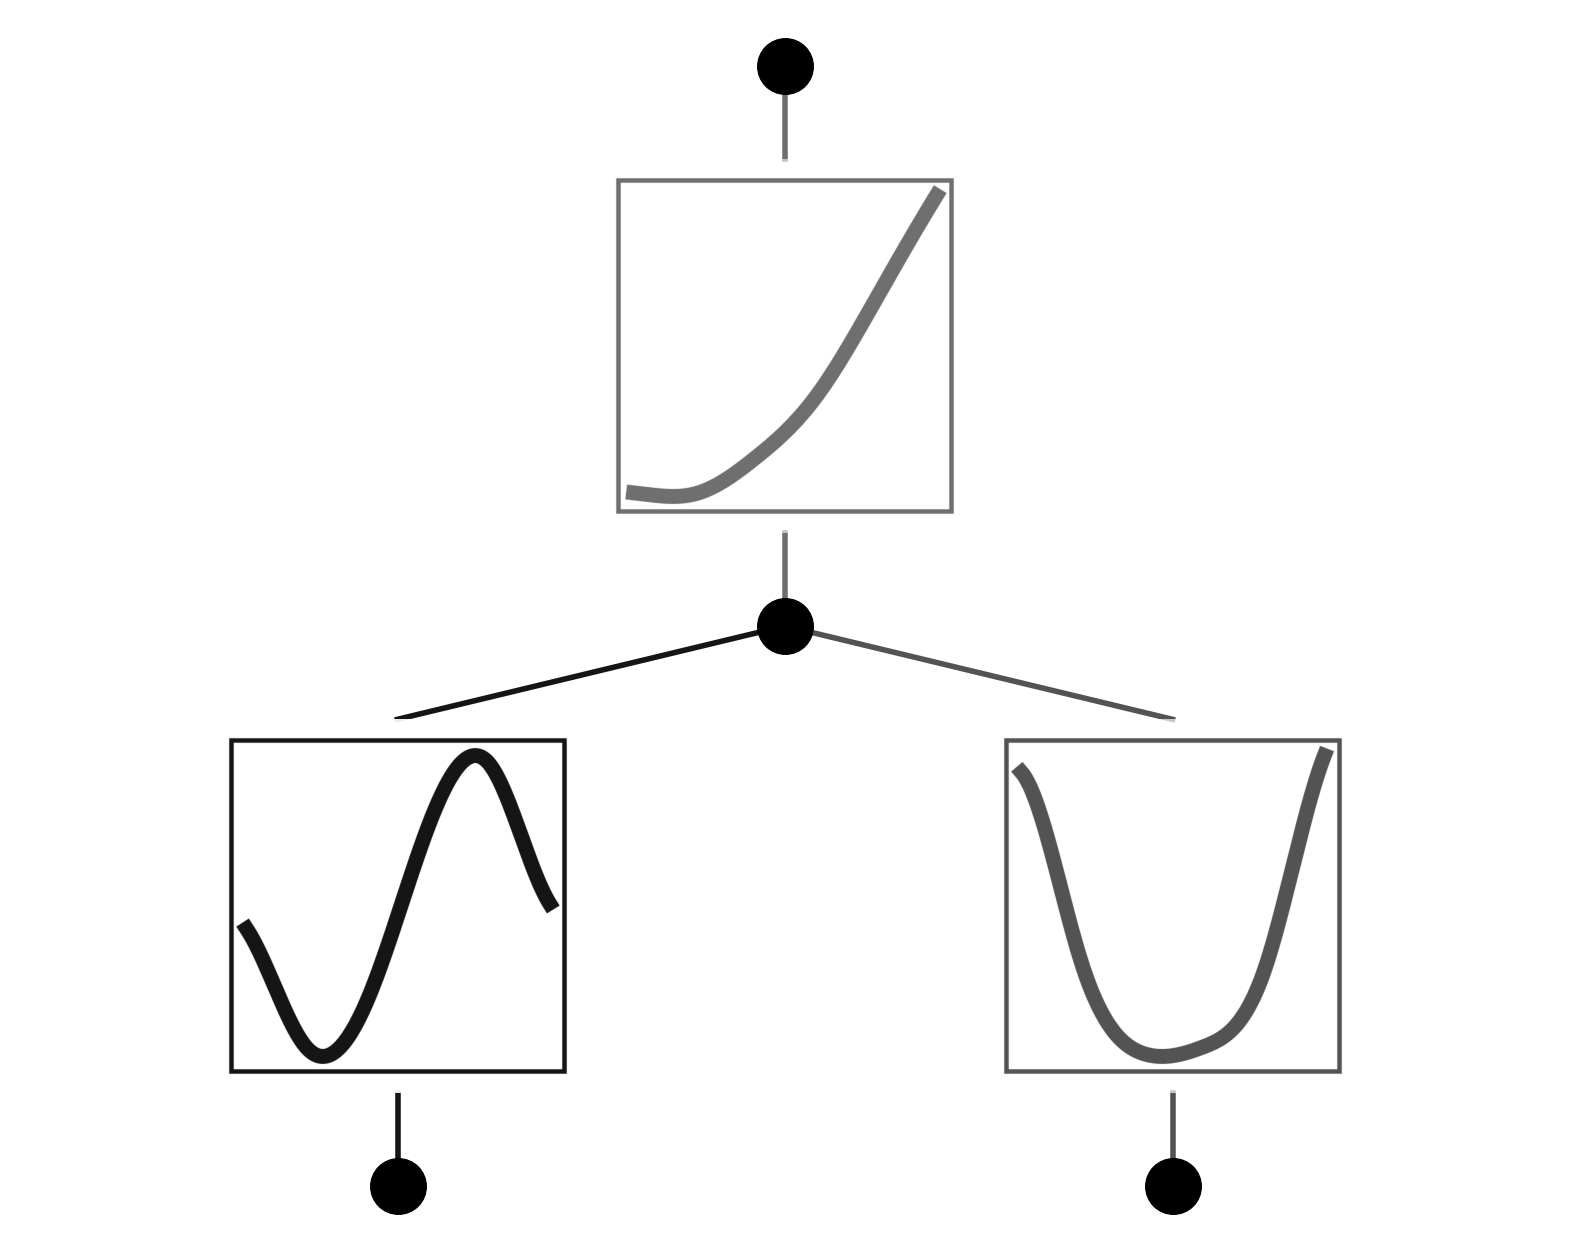

In [20]:
model2.plot(scale=2.0)

If you want to see sample distribution in addition to the line, set "sample=True"

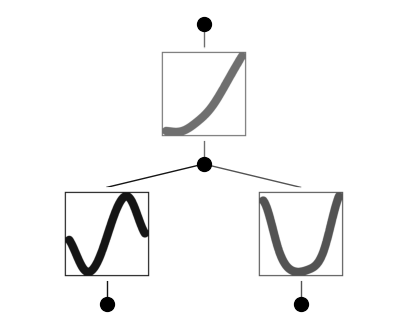

In [21]:
model2(dataset['train_input'])
model2.plot(sample=True)

The samples are more visible if we use a smaller number of samples

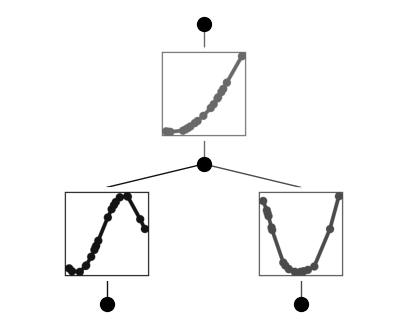

In [22]:
model2(dataset['train_input'][:20])
model2.plot(sample=True)

If a function is set to be symbolic, it becomes red

In [32]:
model2.fix_symbolic(0,1,0,'x^2')

Best value at boundary.
r2 is 0.9929886150319632


tensor(0.9930)

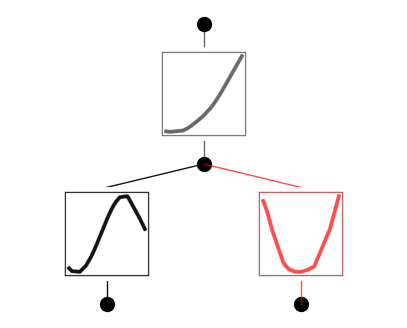

In [24]:
model2.plot()

If a function is set to be both symbolic and numeric (its output is the addition of symbolic and spline), then it shows up in purple

In [27]:
model2.set_mode(0,1,0,mode='ns')

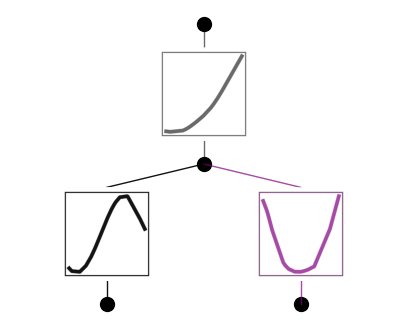

In [28]:
model2.plot()